<a href="https://colab.research.google.com/github/NitafBar/Diamond-Price-Prediction/blob/main/Diamond%20Price%20Prediction%20-%20Course%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Project
Project Group 21

---
Steven Hoang s3600563

Nitaf Bar s3717378

Andrew Man s3659127

Nick Koay s3658845


# Predicting Price of Diamonds


## Introduction

The objective of this course project is to predict the price of diamonds using the "diamonds" dataset provided by Tidyverse. The dataset was sourced from Tidyverse's ggplot2 Github repository at https://github.com/tidyverse/ggplot2.

### Table of Contents:


*   <a href='#Overview'>Overview</a>
*   <a href='#Data_Preparation'>Data Preparation</a>
*   <a href='#Data_Exploration'>Data Exploration</a>
*   <a href='#Statistical_Modelling_and_Performance_Evaluation'>Statistical Modelling and Performance Evaluation</a>
*   <a href='#Summary_and_Conclusions'>Summary and Conclusions</a>





<a id="Overview"></a>

# **Overview**

## **Data Source**



The Tidyverse ggplot2 Github repository offers the dataset, "diamonds.csv". The  dataset has 53,940 rows/observations (not including the first row that is reserved for the column names). The dataset consists of 9 independent variables (descriptive features) and one response variable (target feature).

## Project Objective

Australia is one of the greatest diamond producing countries in the world. Our objective for this course project is to predict the price of diamonds using relevant descriptive features from our chosen diamonds dataset. Additionally, many people come across diamonds at least once in their life, usually to purchase diamond jewellery as a token of affection. Our team believes that having an accurate idea of the prices of diamonds can be beneficial to some amount of people in society.

## Target Feature

The target feature for this course project is `price`, which is a continuous numerical feature. Therefore, our project is on multiple linear regression.

## Descriptive Features

*   **`carat`**: Weight of the diamond (0.2 to 5.01). Continuous.

*   **`cut`**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal).

*   **`color`**: Diamond colour, from D (best) to J (worst).

*   **`clarity`**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).

*   **`depth`**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 to 79). Continuous.

*   **`table`**: Width of top of diamond relative to widest point (43 to 95). Continuous.

*  **`x`**: Length in mm (0 to 10.74). Continuous.

*   **`y`**: Width in mm (0 to 58.9). Continuous.

*   **`z`**: depth in mm (0 to 31.8). Continuous.

<a id="Data_Preparation"></a>

# Data Preparation

## Foundations for Data Preparation

We begin by importing all the modules that will be used for the course project.

In [ ]:
# Importing common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

The csv file is read from the Tidyverse ggplot2 Github repository. Random sample data of the diamond dataset is then displayed to ensure that the dataset has been correctly read.

In [ ]:
#Data is read in from a Github repository on the web.

diamonds = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv")

#Displays a random sample of 5 rows from the dataset.
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
10955,1.03,Premium,G,SI1,58.2,59.0,4900,6.70,6.64,3.88
10664,1.20,Fair,J,SI1,65.2,58.0,4838,6.67,6.58,4.32
25774,2.11,Very Good,I,SI1,62.4,53.0,14740,8.17,8.27,5.13
6476,0.90,Good,E,SI1,62.4,62.0,4054,6.13,6.17,3.84
41855,0.61,Premium,G,SI1,60.8,60.0,1255,5.42,5.42,3.31


## Data Cleaning and Transformation

We must check to ensure that the rows and columns as well as the data types of features are correct.

In [ ]:
print(f"The shape of the dataset is {diamonds.shape} \n")
print("The data types are listed below. 'Object' indicates a string type:")
print(diamonds.dtypes)

The shape of the dataset is (53940, 10) 

The data types are listed below. 'Object' indicates a string type:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


## Checking for Missing Values

We need to check for any missing values to make sure that our data is consistent.

In [ ]:
print("The number of missing values for each feature in the dataset:\n")
print(diamonds.isnull().sum())

The number of missing values for each feature in the dataset:

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


## Summary Statistics

Two tables are shown for the summary of continuous features because `price` is an int64 type and the rest of the features are a float64 type.



In [ ]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features (int)</b>'))
display(diamonds.describe(include='int64'))
print()
display(HTML('<b>Table 2: Summary of continuous features (float)</b>'))
display(diamonds.describe(include='float64'))

,price
count,53940.000000
mean,3932.799722
std,3989.439738
min,326.000000
25%,950.000000
50%,2401.000000
75%,5324.250000
max,18823.000000


,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [ ]:
display(HTML('<b>Table 3: Summary of categorical features</b>'))
diamonds.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## Continuous Features

The `depth` is redundant as it is derived from `x`, `y`, and `z`. Therefore, we will remove it.

In [ ]:
diamonds = diamonds.drop(columns=['depth'])

## Categorical Features

The categorical features are correct and in line with the documentation.

In [ ]:
categoryHeaders = diamonds.columns[diamonds.dtypes==object].tolist()

for col in categoryHeaders:
    print('Unique values for ' + col)
    print(diamonds[col].unique())
    print()

Unique values for cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique values for color
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



We clean the data here by replacing "Very Good" with "Very_Good". We do this so that we do not have an empty space because when using the code to fit an OLS model to our encoded data, having a space instead of an underscore gives an error.

In [ ]:
diamonds = diamonds.replace(to_replace ="Very Good", value="Very_Good" )
#We show the first 6 rows because Very_Good is on the 6th row and we want to see if our above code worked.
diamonds.head(6)

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very_Good,J,VVS2,57.0,336,3.94,3.96,2.48


<a id="Data_Exploration"></a>

# Data Exploration

Our data has been checked and has been found to be clean after our changes. The data is ready to be visualised and modelled.


## Univariate Visualisation

The box plot of price shows us that the prices is right skewed.

Price has a lower quartile of 950.00 and upper quartile of 5324.250.

According to the box lot, prices above 11885.6250 are considered to be outliers. 

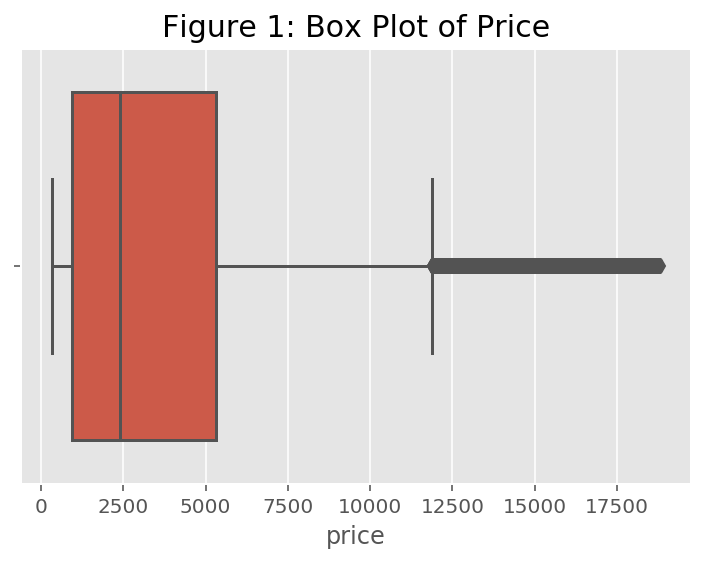

 IQR of Price =  4374.250000
 Max Whiksker of Price =  11885.625000


In [ ]:
# Creating a box plot of price
sns.boxplot(diamonds['price']).set_title('Figure 1: Box Plot of Price', fontsize = 15)
plt.show();
outliersCount = 0
q1, q3= np.percentile(diamonds.price,[25,75])
print (''' IQR of Price = ''','%2f'%(5324.250000 - 950.000000 ))
print (''' Max Whiksker of Price = ''','%2f'% (5324.250000 + (1.5*4374.250000)))


The histogram of price shows us that the prices is right skewed.

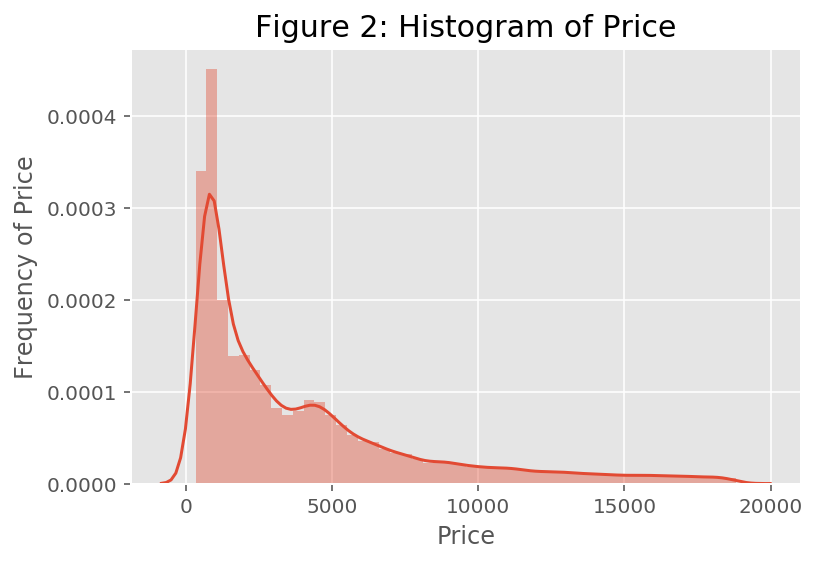

In [ ]:
# Creating a histogram of age
sns.distplot(diamonds['price'], kde = True).set_title('Figure 2: Histogram of Price', fontsize = 15)
plt.ylabel("Frequency of Price")
plt.xlabel("Price")

plt.show();

The Bar Chart of count of quality diamond cuts

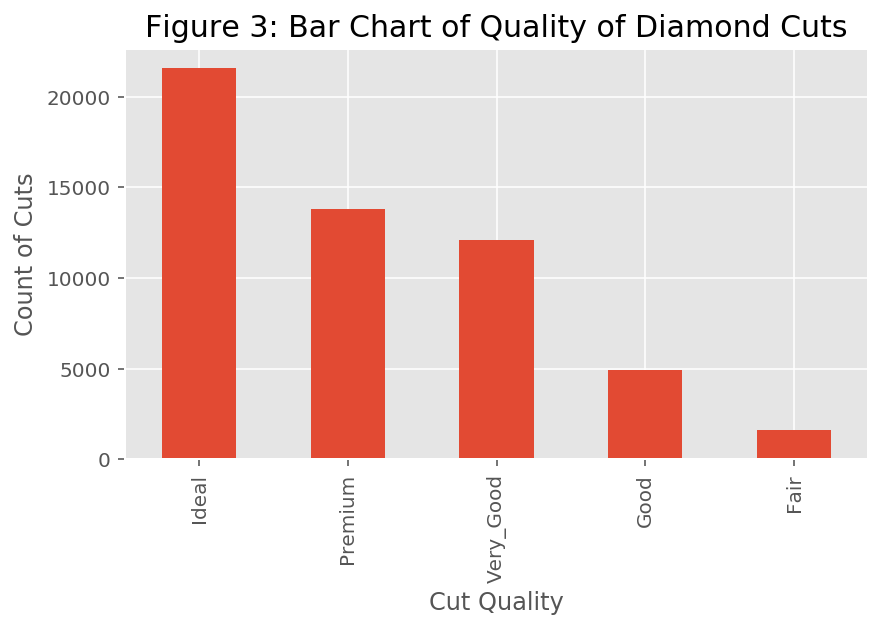

In [ ]:
ax = diamonds['cut'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 3: Bar Chart of Quality of Diamond Cuts', fontsize = 15)
plt.ylabel("Count of Cuts")
plt.xlabel("Cut Quality")
plt.show();



## Multivariate Visualisation
### Two variable plots
#### Scatterplot of Numeric Features and Price
The scatterplot in Figure 4 shows that the price of the diamond is dependant on the carat.
The plot suggests that the higher the carat of the diamond, the higher the price.
Showing an uphill pattern progressing from the left to the right side of the plot, suggests that there is a positive relations shipve between Price and Carat. 


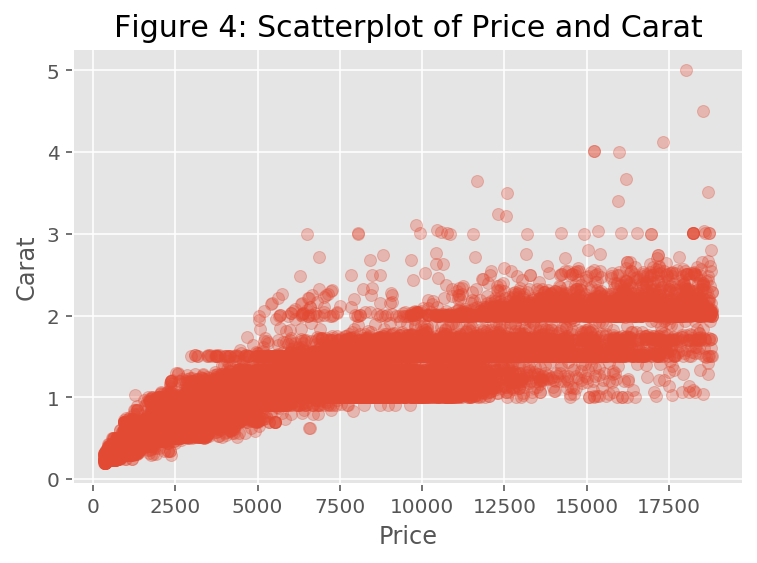

In [ ]:
# Creating a scatter plot
plt.scatter(diamonds['price'], diamonds['carat'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of Price and Carat', fontsize = 15)
plt.xlabel('Price')
plt.ylabel('Carat')
plt.show();i

#### Box Plot of Categorical Features by Price

According to Figure 5, the distribution of prices in regards to the diamond colour differs.
only colours D, E, F and G have somewhat similar medians. 

The boxplot suggests that the prices of diamonds with colours D,E,F and G are quite low, despite being 'higher' on the colour scale. This is likely due to the difficulty of finding a diamond that is rated highly on the Clarity and carat scale.Since the price of each diamond is dependant on more than one factor, Cut and Clarity can substantially alter the prices of each diamond. This is reflected by the high variance of upper whiskers between the different colour of diamonds.



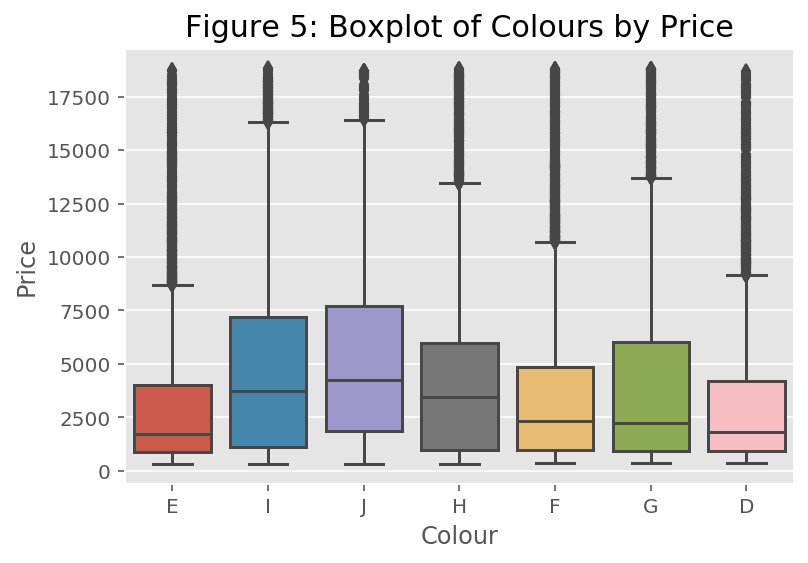

In [ ]:
sns.boxplot(diamonds['color'], diamonds['price']);
plt.title('Figure 5: Boxplot of Colours by Price', fontsize = 15)
plt.xlabel('Colour')
plt.ylabel('Price')
plt.show();

According to this Figure 6 , the distribution of prices in regards to clarity is also highly variable. 

The median prices of diamonds with IF,VVS1 and VVS2 are somewhat similar.

Similar to the Colour boxplot above, the upper whisker of higher grade diamonds are substantially lower than that of the lower grades. As stated previously , the prices of each diamond is highly dependant on more than one factor.

The outlying prices of the higher grade diamonds such as LF, VVS1 and VVS2 suggests that on the rare occasion that the clarity , colour and cut of a diamond is high on each scale, prices can increase drastically.  

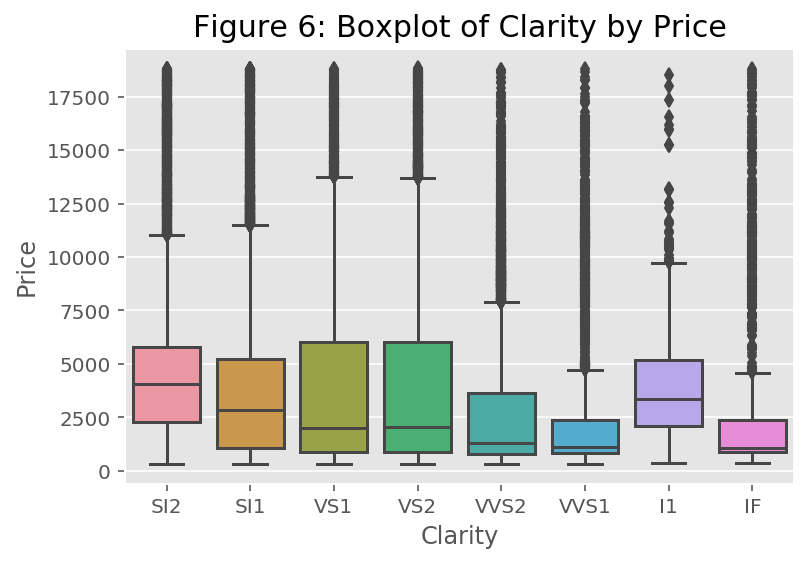

In [ ]:
sns.boxplot(diamonds['clarity'], diamonds['price']);
plt.title('Figure 6: Boxplot of Clarity by Price', fontsize = 15)
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show();

###Three Variable Plots

In Figure 7, the box plot shows the distribution of prices between the I1 and IF in relation to differing colours.

The box plot suggests that the median price of diamonds with I1 clarity is higher than the median price of diamonds with IF clarity on most colours. 

The median prices of diamonds with the IF clarity is mostly similar , except for diamonds with colour grade 'D'. Contrastingly, the median prices of diamonds with the I1 clarity is inconsistent between each colour.

The price distribution of diamonds with IF clarity is mostly similar , except for diamonds with colour grade 'D', the box plot shows that there is a massive variance of prices for diamonds of that particular grade.

Similarly, the price distribution of diamonds with I1 clarity is mostly similar between each colour grade.

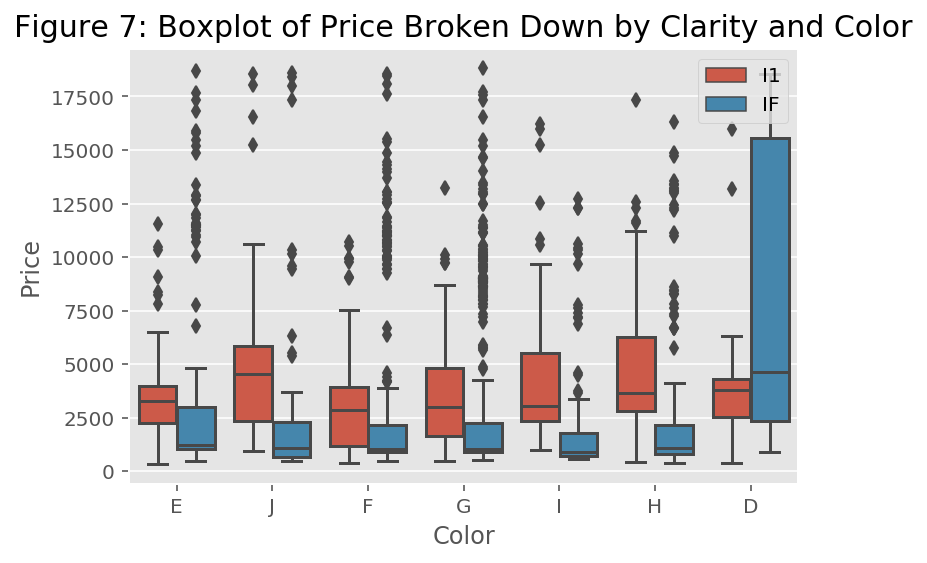

In [ ]:

clarity_mask = diamonds['clarity'].isin(['IF','I1'])

color_mask = (diamonds['color'])

color_clarity_relationship = diamonds[(clarity_mask & color_mask)]

sns.boxplot(color_clarity_relationship['color'], color_clarity_relationship['price'], 
            hue = color_clarity_relationship['clarity'])
plt.title('Figure 7: Boxplot of Price Broken Down by Clarity and Color', fontsize = 15)
plt.legend(loc = 'upper right')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show();

The scatterplot in Figure 8 shows that diamonds with higher clarity grade IF have an exponential increase of price as the carat of the diamond increases.

Contrastingly, the boxplot shows that the prices of diamonds with L1 clarity have a more linear increase in prices in relation to the number of carat.

To achieve the same price as diamonds with IF clarity and have a carat value of approximately 1, diamonds with I1 clarity must have a carat value of above 4.

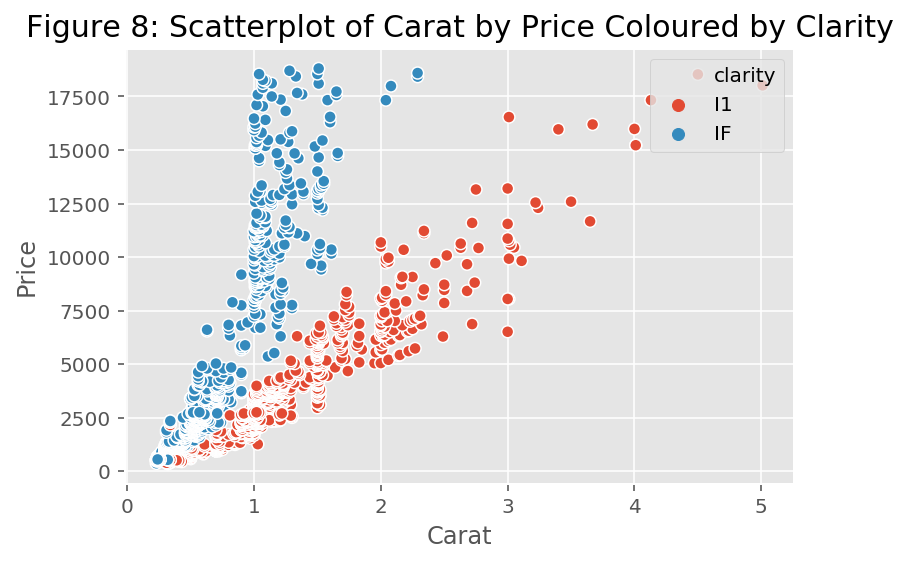

In [ ]:
#
clarity = diamonds[clarity_mask]

sns.scatterplot(clarity['carat'], clarity['price'], hue = clarity['clarity'])
plt.title('Figure 8: Scatterplot of Carat by Price Coloured by Clarity', fontsize = 15);
plt.legend(loc = 'upper right')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show();

<a id="Statistical_Modelling_and_Performance_Evaluation"></a>

# **Statistical Modeling and Performance Evaluation**


## Full Model

We begin by fitting a multiple linear regression that predicts `price` using all of the available features. This would be the full model. We will now look at the data by calling diamonds.head() to view the first 5 rows.

In [ ]:
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


We use the code below to get a formula string of all the variables. We manually add all independent features to the formula.

In [ ]:
formula_string_indep_vars = ' + '.join(diamonds.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + table + x + y + z


As to analyse categorical features, we need to use "one-hot-encoding", and by including with get_dummies(), it help us construct new formula string with encoded features.

In [ ]:
# one-hot-encoding of categorical features
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)
diamonds_encoded.head()

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
formula_string_indep_vars_encoded = ' + '.join(diamonds_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Interaction terms.

In [ ]:
formula_string_encoded = formula_string_encoded + ' + table:carat + clarity_IF:carat'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + table:carat + clarity_IF:carat


Now we have a formula string of our statistical model. We then fit an OLS (ordinary least squares) model to our encoded data.

In [ ]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=diamonds_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.659e+04
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:07:28   Log-Likelihood:            -4.5494e+05
No. Observations:               53940   AIC:                         9.099e+05
Df Residuals:                   53915   BIC:                         9.102e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5537.5628    276.989  

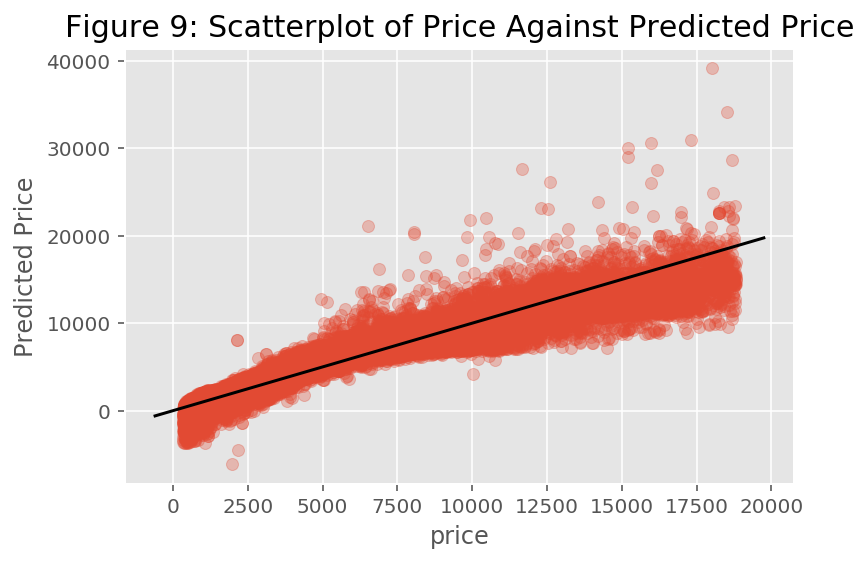

In [ ]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(diamonds_encoded['price'], model_full_fitted.fittedvalues, alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="black");
plt.xlabel('price');
plt.ylabel('Predicted Price');
plt.title('Figure 9: Scatterplot of Price Against Predicted Price', fontsize=15);
plt.show();

This model returns an Ajected R-squared of 0.922, meaning the reduced model still explains about 92% of the variance is explained by the model. From Figure 9, we observe that the model produces up to 40,000, even though the max price is 18823 in the dataset. By looking back at Figure 1, we notice that there are a few insignificant variables at a 5% level. We need to check the diagonstics for the full model.

## Full Model Diagnostic Checks

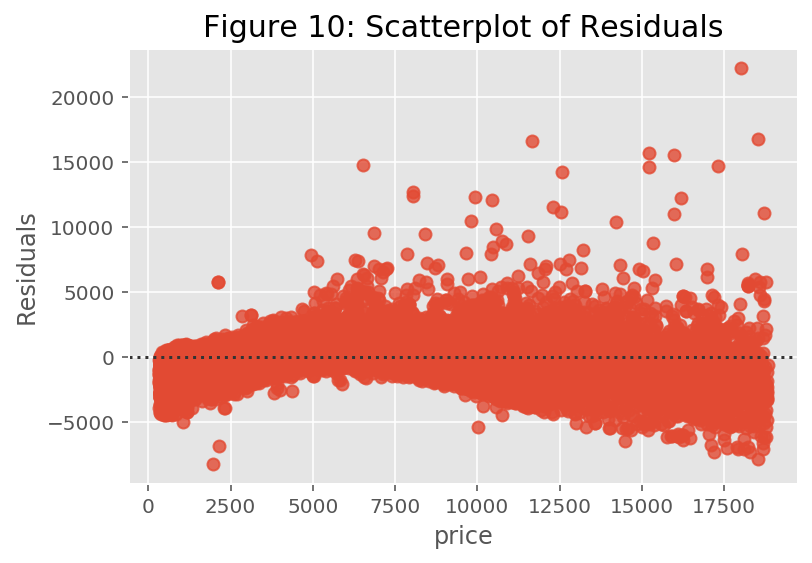

In [ ]:
sns.residplot(x=diamonds_encoded['price'], y=model_full_fitted.fittedvalues);
plt.ylabel('Residuals')
plt.title('Figure 10: Scatterplot of Residuals', fontsize=15)
plt.show();

From Figure 10, most of the residuals appear in random and centered around 0. The exception is those above the max, 18823, which the model predicts less cost for diamonds.

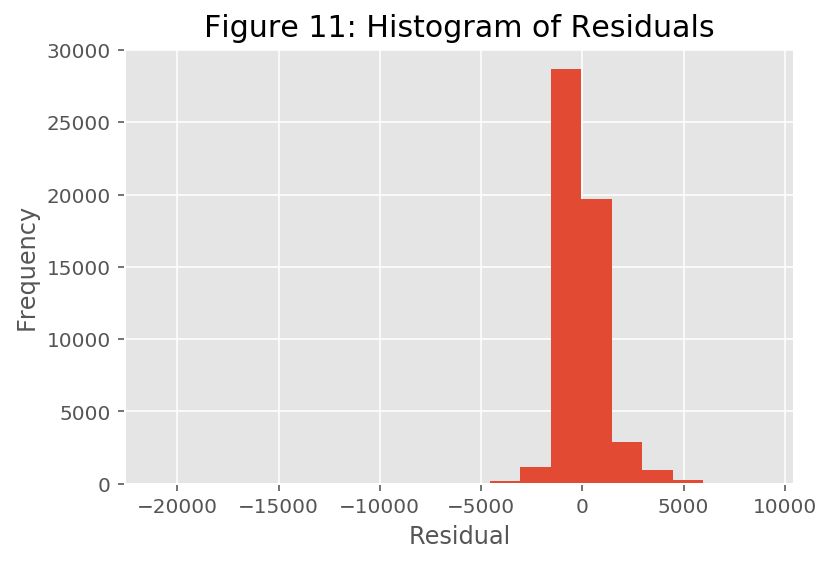

In [ ]:
residuals = diamonds_encoded['price'] - model_full_fitted.fittedvalues
plt.hist(residuals, bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 11: Histogram of Residuals', fontsize=15);
plt.show();

From Figure 11, the histogram of residues looks somewhat symmetrical and slightly skewed to the right. it is suggest as normally distributed.

## Backwards Feature Selection

We now perform backwars varible selection using p-values

In [ ]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=diamonds_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = diamonds_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "y" with p-value 0.1265

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.774e+04
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:07:31   Log-Likelihood:            -4.5494e+05
No. Observations:               53940   AIC:                         9.099e+05
Df Residuals:                   53916   BIC:                         9.101e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

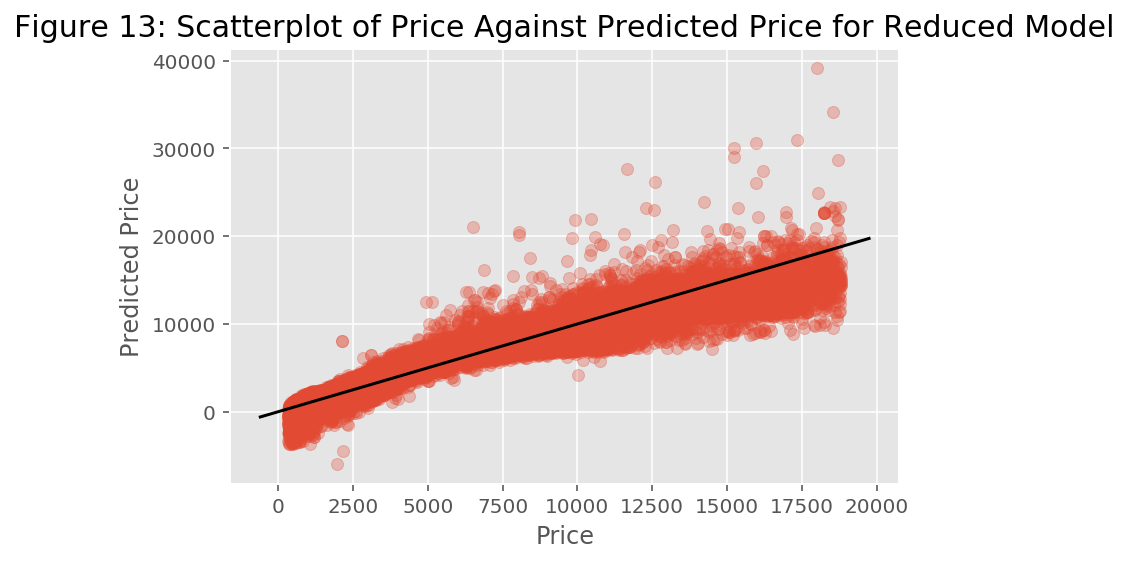

In [ ]:
# Creating scatter plot
plt.scatter(diamonds['price'], model_reduced_fitted.fittedvalues, alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="black");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 13: Scatterplot of Price Against Predicted Price for Reduced Model', fontsize=15);
plt.show(); 

The model returns an Adjusted R-squared of 0.9221, meaning the reduced model explains 92% of the variance, but with 5% less variables. 

## Reduced Model Diagnostic Checks

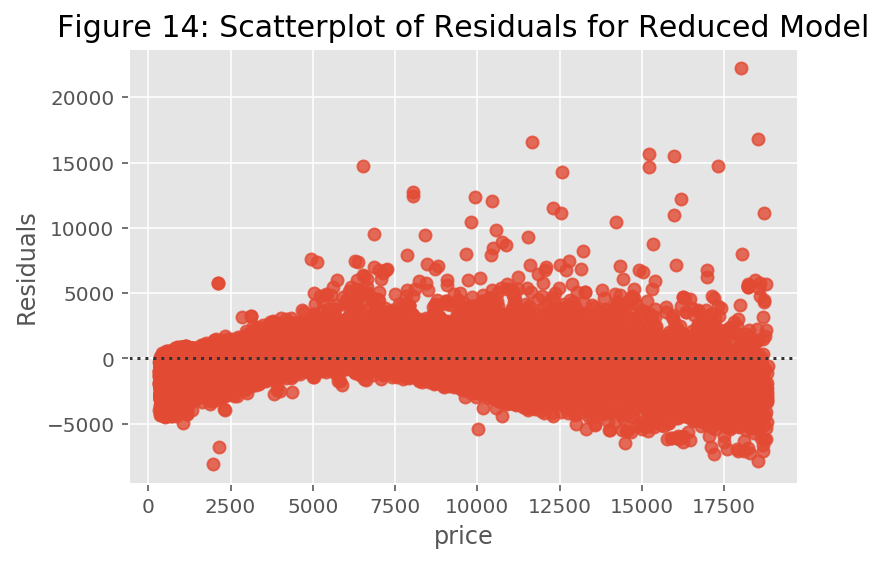

In [ ]:
sns.residplot(x=diamonds_encoded['price'],  y=model_reduced_fitted.fittedvalues);
plt.ylabel('Residuals')
plt.title('Figure 14: Scatterplot of Residuals for Reduced Model', fontsize=15)
plt.show();

Similar to Figure 10, the model appears to have residual around the center of 0.The exception again is those above the price 18000 for which the model predicts mid-ranged price.

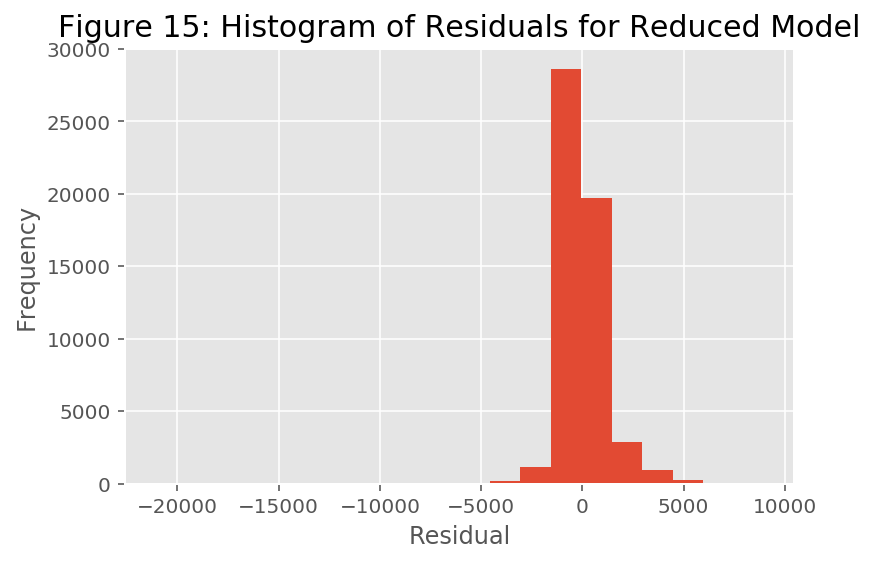

In [ ]:
residuals2 = diamonds_encoded['price'] - model_reduced_fitted.fittedvalues
plt.hist(residuals2, bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of Residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 15, there is again a somewhat symmetric histogram around 0, it is suggests that the residuals are somewhat normally distributed.

<a id="Summary_and_Conclusions"></a>

# Summary and Conclusions

Ultimately due to our use of many regression diagrams and models, we were able to make somewhat accurate predictions of diamond prices. There were no significant violations of the regression assumptions after checking through both risidual scatterplot and histogram. This suggests that our statistical model is valid.

Since our satistical model has not cover all the research of this project,we can only refer to it as theortical research rather than for a practical purpose.

The final models of our research has used an Adjusted R-squared of 92%.Considering we have obtained such a high Adjusted R-Squared value,it is possible to use this dataset to successfully predict the prices of diamond in the near future.

# References

Ggplot2.tidyverse.org. (2019). Prices of 50,000 round cut diamonds — diamonds. [online] Available at: https://ggplot2.tidyverse.org/reference/diamonds.html [Accessed 23 Oct. 2019].

GitHub. (2019). tidyverse/ggplot2. [online] Available at: https://github.com/tidyverse/ggplot2/blob/master/data-raw/diamonds.csv [Accessed 23 Oct. 2019].